In [77]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

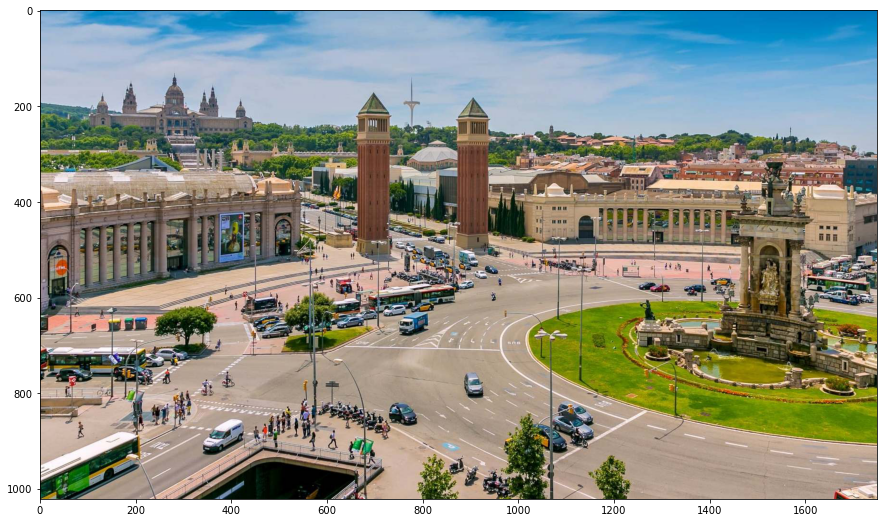

In [148]:
img = cv2.imread('data/spain.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [149]:
# Convert image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [169]:
# Obtain edge map
# Hint: you can use Canny edge detector with th_low = 100, th_high = 150
edges = cv2.Canny(gray, 100, 150)

(<AxesSubplot:title={'center':'Edge map'}>,
 Text(0.5, 1.0, 'Edge map'))

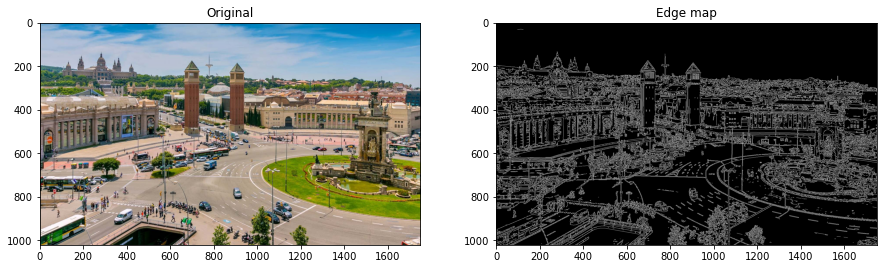

In [170]:
# Let's plot the images
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(edges, cmap='gray'), plt.title('Edge map')

In [158]:
# Apply Hough transform to parametrize the lines
# Hint 1: Offset resolution of 5 pixels and slope resolution of 5 degrees work well in this case
# Hint 2: A suitable value for the accumulator threshold is 90
lines = cv2.HoughLines(image=edges, rho=5, theta=(5*np.pi)/180, threshold=90)
# Let's get rid of the unnecessary dimension
lines = lines[:, 0, :]

# for my own unerstanding
for line in lines:
    print(line)
    print(line[0])
    print(line[1])
    break

[275.          1.5707963]
275.0
1.5707963


(<AxesSubplot:title={'center':'Hough lines'}>,
 Text(0.5, 1.0, 'Hough lines'))

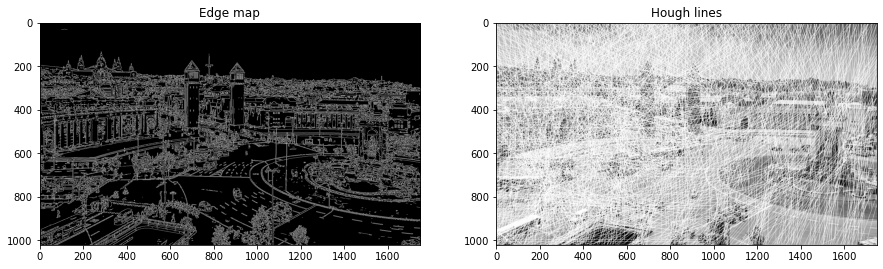

In [166]:
# Plot the resulting Hough lines
result = np.copy(gray)
        
for line in lines:
    
    rho = line[0]
    theta = line[1]
    
    a = math.cos(theta)
    b = math.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(result, pt1, pt2, 255, 1, cv2.LINE_AA)

plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Hough lines')

In [167]:
# Filter out all lines that are approximately horizontal (+/- 15 degrees). 
filtered_lines = []
print(len(lines))
for line in lines:
    # Extract theta for current line (remember Hough works with radians)
    theta = (line[1]*180)/np.pi
    # Keep line if theta is not horizontal
    if not (75 < theta < 105):    
        filtered_lines.append(line)

1036


(<AxesSubplot:title={'center':'Filtered lines'}>,
 Text(0.5, 1.0, 'Filtered lines'))

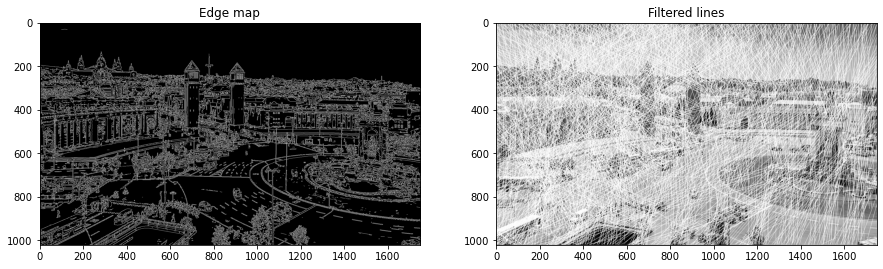

In [164]:
# Let's plot the resulting filtered lines
result = np.copy(gray)
 
for line in filtered_lines:
    rho = line[0]
    theta = line[1]
    
    a = math.cos(theta)
    b = math.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(result, pt1, pt2, 255, 1, cv2.LINE_AA)

plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Filtered lines')

In [162]:
# We will apply k-means clustering to refine the detected lines.
# Don't worry, we will learn about the clustering later in the course :-)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(filtered_lines)
kmeans.cluster_centers_

array([[ 1.28864548e+03,  5.51909294e-01],
       [-8.04510638e+02,  2.76021957e+00],
       [ 3.25394089e+02,  1.31759460e+00]])

(<AxesSubplot:title={'center':'Hough lines'}>,
 Text(0.5, 1.0, 'Hough lines'))

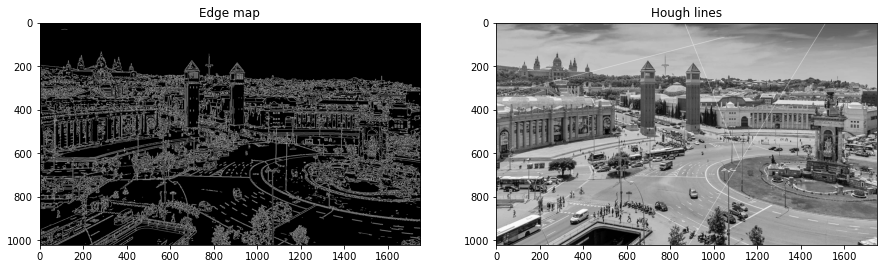

In [165]:
# Again, let's plot the resulting filtered lines
result = np.copy(gray)
    
for line in kmeans.cluster_centers_:
    rho = line[0]
    theta = line[1]
    
    a = math.cos(theta)
    b = math.sin(theta)
    
    x0 = a * rho
    y0 = b * rho
    
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    
    cv2.line(result, pt1, pt2, 255, 1, cv2.LINE_AA)

plt.subplot(121), plt.imshow(edges, cmap='gray'), plt.title('Edge map')
plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Hough lines')

In [171]:
# Answers
# 1. The strange is only 3 lines in final result, understand that is 3 clusters number
# 2. I think that the Hough transform resolution is important for obtaining a good result,
# case it can get highly detailed edges in different angles
# 3. Threshold is important to get remove rubbish(noise) in different treshlolding levels.